### 1. Import and data loading

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load clean dataset 
df = pd.read_csv("data/chess_games_clean.csv")
df

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,blitz
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,blitz
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,blitz
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,blitz
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,blitz
...,...,...,...,...,...,...,...,...,...
3266127,Rated Blitz game,2024.12.31,AfricanJo,Yuri_Guenther,1/2-1/2,C47,2665,2655,blitz
3266128,Rated Blitz game,2024.12.31,cad2024,emiliofelixramirez,1-0,D23,2537,2449,blitz
3266129,Rated Blitz game,2024.12.31,learningchessreally,BiletskiyDanylo,0-1,A15,2583,2557,blitz
3266130,Rated Blitz game,2024.12.31,lotrisking,ezis71,1-0,D30,2513,2398,blitz


### 2. Variable encoding
Convert `Result` to numeric for machine learning

In [3]:
result_map = {
    '1-0': 2,
    '0-1': 0,
    '1/2-1/2': 1
}

df['ResultNumeric'] = df['Result'].map(result_map)

Also convert the `EventType` to numeric for machine learning

In [4]:
event_type_map = {
    'blitz': 0, 
    'rapid': 1, 
    'classical': 2
}
df['EventTypeID'] = df['EventType'].map(event_type_map)
df.head(10)

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,ResultNumeric,EventTypeID
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,blitz,2,0
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,blitz,1,0
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,blitz,1,0
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,blitz,2,0
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,blitz,0,0
5,Rated Blitz game,2024.01.01,falerito,estaka1,0-1,A08,2404,2534,blitz,0,0
6,Rated Blitz game,2024.01.01,TorBot_SL,ToromBot,1/2-1/2,E61,2860,2922,blitz,1,0
7,Rated Blitz game,2024.01.01,CPU2006,Phalanx-XXV,1-0,D46,2752,2395,blitz,2,0
8,Rated Blitz game,2024.01.01,MadderRose,Philidor23,1-0,B38,2538,2430,blitz,2,0
9,Rated Blitz game,2024.01.01,MassterofMayhem,Pliukha_Mikhail,1-0,B01,2604,2727,blitz,2,0


### 2.5 Exploratory data analysis (EDA)

In [5]:
print(f"Total games: {len(df):,}")
print(f"Total features: {df.shape[1]}")
print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Unique players (White): {df['White'].nunique():,}")
print(f"Unique players (Black): {df['Black'].nunique():,}")
print(f"Unique ECO codes: {df['ECO'].nunique()}")

Total games: 3,266,132
Total features: 11

Date range: 2024.01.01 to 2024.12.31
Unique players (White): 52,138
Unique players (Black): 52,001
Unique ECO codes: 497


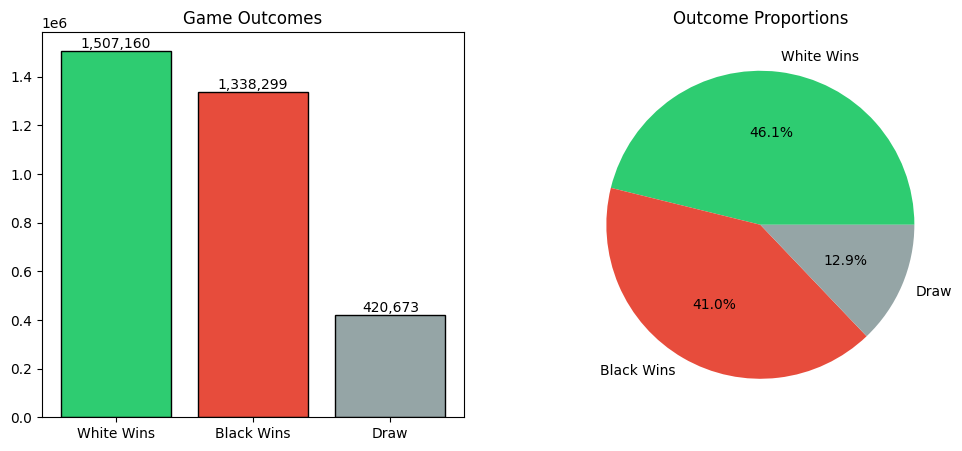

In [6]:
# Count results
counts = df['Result'].value_counts()
labels = ['White Wins', 'Black Wins', 'Draw']
colors = ['#2ecc71', '#e74c3c', '#95a5a6']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart 
axes[0].bar(labels, counts.values, color=colors, edgecolor='black')
axes[0].set_title('Game Outcomes')
for i, v in enumerate(counts.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom')

# Pie chart 
axes[1].pie(counts.values, labels=labels, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Outcome Proportions')

plt.show()


#### Event type

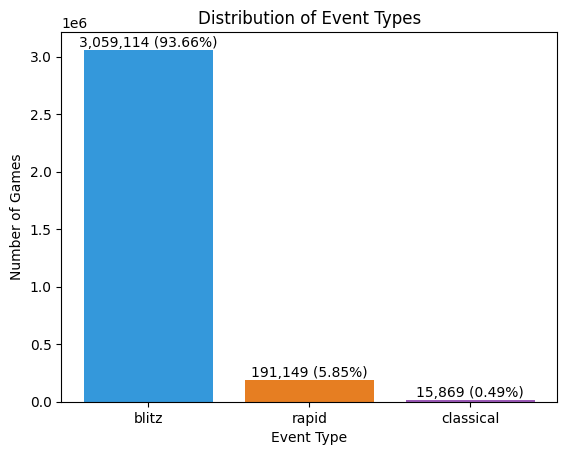

In [7]:
event_counts = df['EventType'].value_counts()
event_pcts = df['EventType'].value_counts(normalize=True) * 100

# Visualization
bars = plt.bar(event_counts.index, event_counts.values,
               color=['#3498db', '#e67e22', '#9b59b6'])

plt.xlabel('Event Type')
plt.ylabel('Number of Games')
plt.title('Distribution of Event Types')

# Add number above each bar
for bar in bars:
    event = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    pct = (height / event_counts.sum()) * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height):,} ({pct:.2f}%)",
        ha="center", va="bottom"
    )

plt.show()


#### Elo rating 

/tmp/ipykernel_744355/2427650108.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['White Elo', 'Black Elo'])


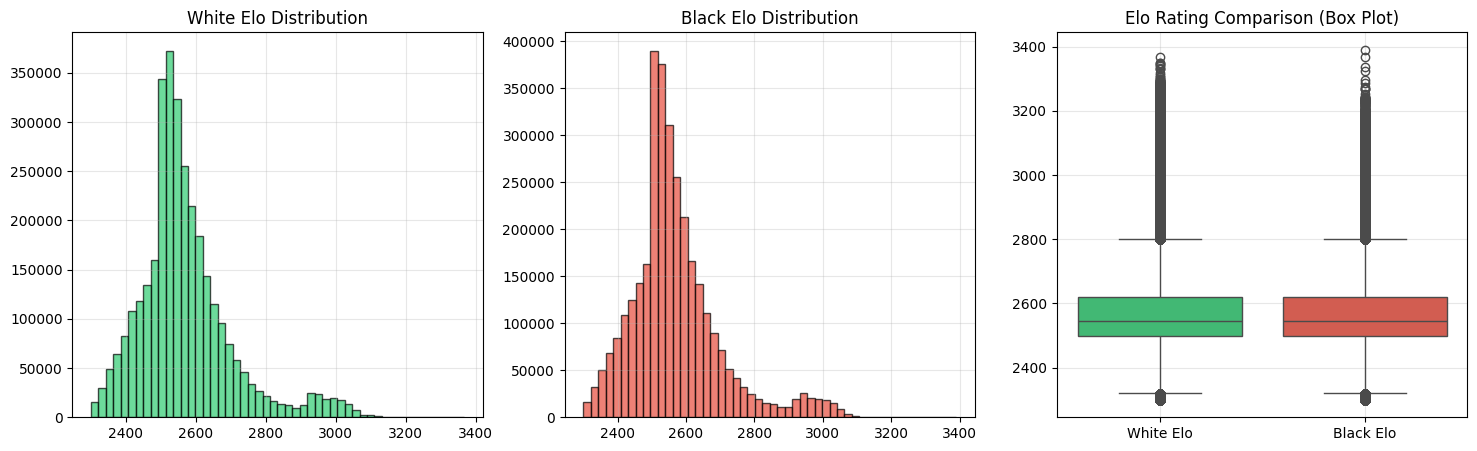

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for White Elo
axes[0].hist(df['WhiteElo'], bins=50, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0].set_title('White Elo Distribution')
axes[0].grid(alpha=0.3)

# Histogram for Black Elo
axes[1].hist(df['BlackElo'], bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1].set_title('Black Elo Distribution')
axes[1].grid(alpha=0.3)

# Boxplot comparison
sns.boxplot(data=[df['WhiteElo'], df['BlackElo']],
            palette=['#2ecc71', '#e74c3c'],
            ax=axes[2])
axes[2].set_xticklabels(['White Elo', 'Black Elo'])
axes[2].set_title('Elo Rating Comparison (Box Plot)')
axes[2].grid(alpha=0.3)

plt.show()


#### ECO / Opening


Top 20 Most Common Openings:
   1. A45: 80,625 (2.47%)
   2. A00: 78,076 (2.39%)
   3. D02: 69,062 (2.11%)
   4. B00: 66,944 (2.05%)
   5. B12: 64,872 (1.99%)
   6. A05: 64,522 (1.98%)
   7. A40: 63,424 (1.94%)
   8. A04: 60,726 (1.86%)
   9. B06: 58,789 (1.80%)
  10. B40: 57,613 (1.76%)
  11. B01: 53,759 (1.65%)
  12. A01: 50,088 (1.53%)
  13. D00: 48,299 (1.48%)
  14. A46: 47,893 (1.47%)
  15. C00: 47,785 (1.46%)
  16. B10: 46,702 (1.43%)
  17. B23: 45,140 (1.38%)
  18. B90: 42,803 (1.31%)
  19. B22: 42,082 (1.29%)
  20. B30: 40,029 (1.23%)

Top 20 ECO codes coverage: 34.57% of all games


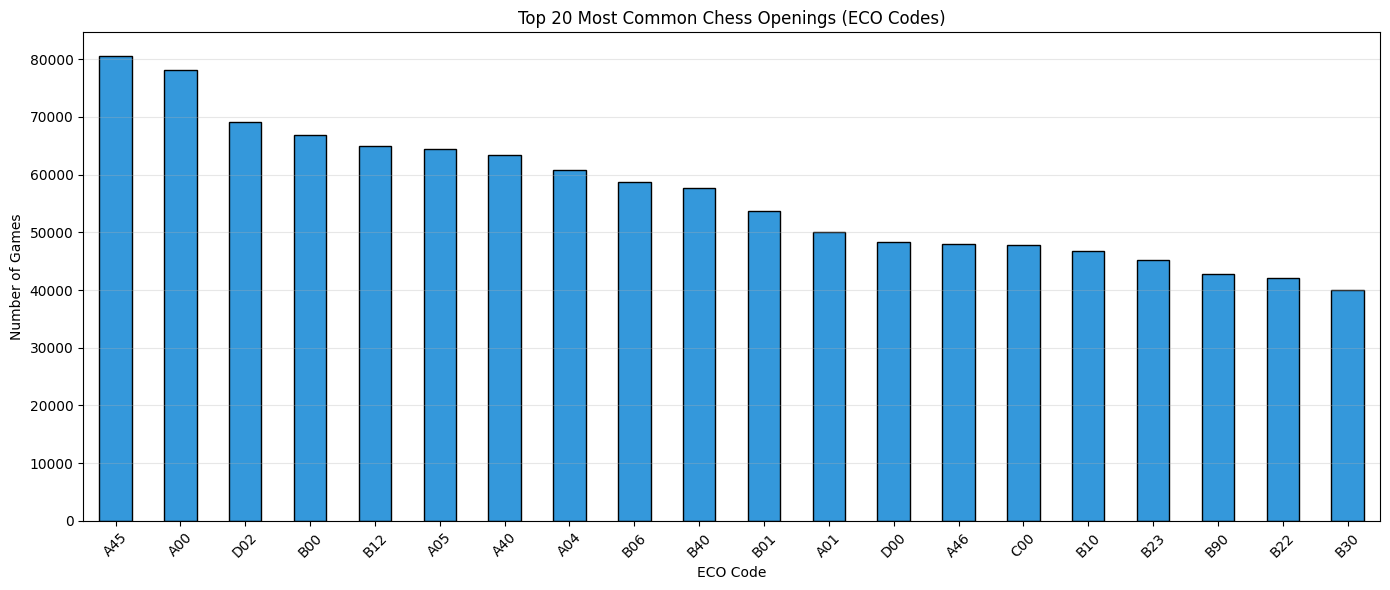

In [9]:
print(f"\nTop 20 Most Common Openings:")
top_20_display = df['ECO'].value_counts().head(20)
for i, (eco, count) in enumerate(top_20_display.items(), 1):
    pct = count / len(df) * 100
    print(f"  {i:2d}. {eco}: {count:,} ({pct:.2f}%)")

# Coverage analysis
top_20_coverage = top_20_display.sum() / len(df) * 100
print(f"\nTop 20 ECO codes coverage: {top_20_coverage:.2f}% of all games")

# Visualization
plt.figure(figsize=(14, 6))
top_20_display.plot(kind='bar', color='#3498db', edgecolor='black')
plt.xlabel('ECO Code')
plt.ylabel('Number of Games')
plt.title('Top 20 Most Common Chess Openings (ECO Codes)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


#### Initial correlation

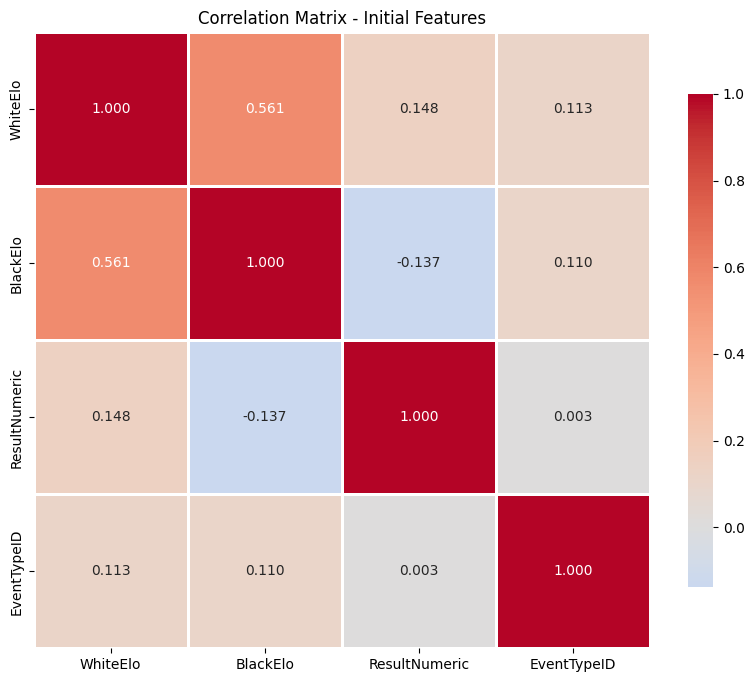

In [10]:
numeric_cols = ['WhiteElo', 'BlackElo', 'ResultNumeric', 'EventTypeID']
corr_matrix = df[numeric_cols].corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Initial Features')

plt.show()

#### Result by event type

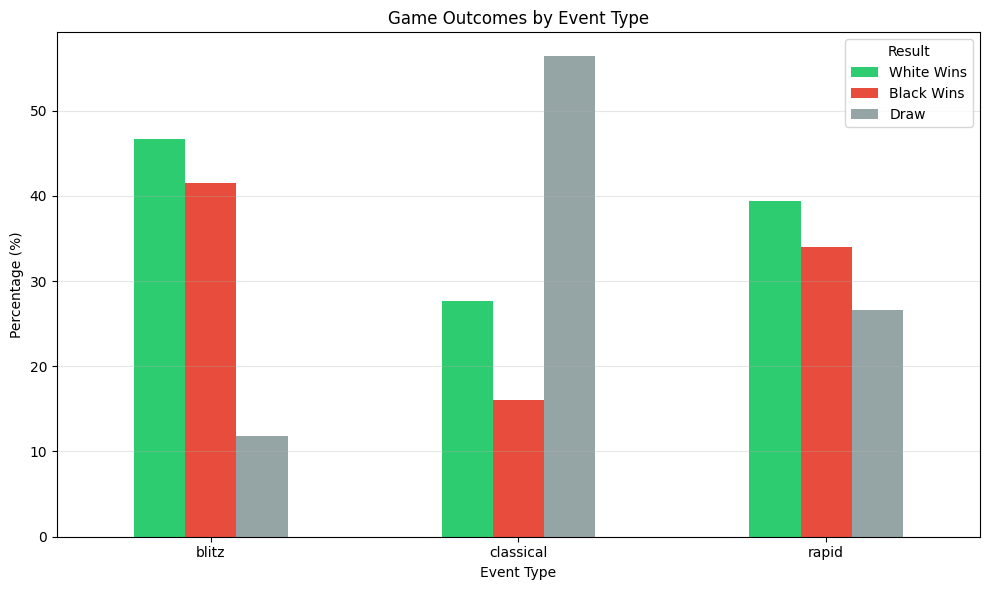

In [11]:
result_by_event = pd.crosstab(df['EventType'], df['Result'], normalize='index') * 100
result_by_event = result_by_event[['1-0', '0-1', '1/2-1/2']]
result_by_event.columns = ['White Wins', 'Black Wins', 'Draw']

# Visualization
result_by_event.plot(kind='bar', stacked=False, figsize=(10, 6),
                     color=['#2ecc71', '#e74c3c', '#95a5a6'])

plt.xlabel('Event Type')
plt.ylabel('Percentage (%)')
plt.title('Game Outcomes by Event Type')
plt.legend(title='Result', labels=['White Wins', 'Black Wins', 'Draw'])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### 3. Basic feature engineering
create new numeric features for machine learning 

In [12]:
# Rating difference
df['RatingDiff'] = np.abs(df['WhiteElo'] - df['BlackElo'])

# Average rating
df['AvgRating'] = (df['WhiteElo'] + df['BlackElo']) / 2

# Indicator if White is higher rated (binary)
df['WhiteIsHigherRated'] = (df['WhiteElo'] > df['BlackElo']).astype(int)

# Rating advantage (signed - keeps direction)
df['WhiteRatingAdvantage'] = df['WhiteElo'] - df['BlackElo']

# Elo categories for both players
df['WhiteEloCategory'] = pd.cut(df['WhiteElo'], 
                                 bins=[0, 2300, 2400, 2500, 2600, 3000],
                                 labels=['2200-2300', '2300-2400', '2400-2500', '2500-2600', '2600+'])

df['BlackEloCategory'] = pd.cut(df['BlackElo'], 
                                 bins=[0, 2300, 2400, 2500, 2600, 3000],
                                 labels=['2200-2300', '2300-2400', '2400-2500', '2500-2600', '2600+'])

df['WhiteElo_squared'] = df['WhiteElo'] ** 2
df['BlackElo_squared'] = df['BlackElo'] ** 2
df['RatingDiff_squared'] = df['RatingDiff'] ** 2

df

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,WhiteEloCategory,BlackEloCategory,WhiteElo_squared,BlackElo_squared,RatingDiff_squared
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,blitz,2,0,133,2437.5,1,133,2500-2600,2300-2400,6270016,5621641,17689
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,blitz,1,0,109,2541.5,0,-109,2400-2500,2500-2600,6185169,6739216,11881
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,blitz,1,0,6,2918.0,0,-6,2600+,2600+,8497225,8532241,36
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,blitz,2,0,109,2487.5,1,109,2500-2600,2400-2500,6461764,5919489,11881
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,blitz,0,0,185,2565.5,0,-185,2400-2500,2600+,6115729,7064964,34225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266127,Rated Blitz game,2024.12.31,AfricanJo,Yuri_Guenther,1/2-1/2,C47,2665,2655,blitz,1,0,10,2660.0,1,10,2600+,2600+,7102225,7049025,100
3266128,Rated Blitz game,2024.12.31,cad2024,emiliofelixramirez,1-0,D23,2537,2449,blitz,2,0,88,2493.0,1,88,2500-2600,2400-2500,6436369,5997601,7744
3266129,Rated Blitz game,2024.12.31,learningchessreally,BiletskiyDanylo,0-1,A15,2583,2557,blitz,0,0,26,2570.0,1,26,2500-2600,2500-2600,6671889,6538249,676
3266130,Rated Blitz game,2024.12.31,lotrisking,ezis71,1-0,D30,2513,2398,blitz,2,0,115,2455.5,1,115,2500-2600,2300-2400,6315169,5750404,13225


### 4. Opening encoding (ECO)
Since there is almost 500 different ECO, we decide to just use the top 20 most use while the rest will be others.

In [13]:
# Get top 20 ECO codes
top_20_eco = df['ECO'].value_counts().head(20).index.tolist()

# Group less frequent ECO codes into 'Other'
def group_eco(code):
    if code in top_20_eco:
        return code
    return 'Other'

df['ECOGroup'] = df['ECO'].apply(group_eco)
df.head()

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,ResultNumeric,...,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,WhiteEloCategory,BlackEloCategory,WhiteElo_squared,BlackElo_squared,RatingDiff_squared,ECOGroup
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,blitz,2,...,133,2437.5,1,133,2500-2600,2300-2400,6270016,5621641,17689,Other
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,blitz,1,...,109,2541.5,0,-109,2400-2500,2500-2600,6185169,6739216,11881,Other
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,blitz,1,...,6,2918.0,0,-6,2600+,2600+,8497225,8532241,36,Other
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,blitz,2,...,109,2487.5,1,109,2500-2600,2400-2500,6461764,5919489,11881,B40
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,blitz,0,...,185,2565.5,0,-185,2400-2500,2600+,6115729,7064964,34225,Other


### 5. One hot encode features

In [14]:
# ONE-HOT ENCODE ECO
eco_dummies = pd.get_dummies(df['ECOGroup'], prefix='ECO', drop_first=False).astype(int)

# ONE-HOT ENCODE EventType
event_dummies = pd.get_dummies(df['EventType'], prefix='Event', drop_first=False).astype(int)

# ONE-HOT ENCODE Elo Categories
white_elo_cat = pd.get_dummies(df['WhiteEloCategory'], prefix='WhiteEloCat', drop_first=False).astype(int)
black_elo_cat = pd.get_dummies(df['BlackEloCategory'], prefix='BlackEloCat', drop_first=False).astype(int)

# Add all dummies at once
df = pd.concat([df, eco_dummies, event_dummies, white_elo_cat, black_elo_cat], axis=1)

print(f"✓ One-hot encoding complete:")
print(f"  - ECO columns: {len(eco_dummies.columns)}")
print(f"  - Event columns: {len(event_dummies.columns)}")
print(f"  - White Elo cat: {len(white_elo_cat.columns)}")
print(f"  - Black Elo cat: {len(black_elo_cat.columns)}")

✓ One-hot encoding complete:
  - ECO columns: 21
  - Event columns: 3
  - White Elo cat: 5
  - Black Elo cat: 5


### 6. Remove unneeded columns

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
# 'Event', 'EventType', 'Result','ECO' and 'ECOGroup' can be drop because there is 'EventTypeID', 'ECOID', 'ResultNumeric'
# 'Date' is not used for the data since it is just data about time 
# Same with 'White' and 'Black', these are just the username so the data is not used
df = df.drop(['Event', 'Date', 'White', 'Black', 'Result', 'ECO', 'EventType', 'ECOGroup', 'WhiteEloCategory', 'BlackEloCategory', 'EventTypeID'], axis=1)

### 6. Exported featured data
Final check before export into csv

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3266132 entries, 0 to 3266131
Data columns (total 44 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   WhiteElo               int64  
 1   BlackElo               int64  
 2   ResultNumeric          int64  
 3   RatingDiff             int64  
 4   AvgRating              float64
 5   WhiteIsHigherRated     int64  
 6   WhiteRatingAdvantage   int64  
 7   WhiteElo_squared       int64  
 8   BlackElo_squared       int64  
 9   RatingDiff_squared     int64  
 10  ECO_A00                int64  
 11  ECO_A01                int64  
 12  ECO_A04                int64  
 13  ECO_A05                int64  
 14  ECO_A40                int64  
 15  ECO_A45                int64  
 16  ECO_A46                int64  
 17  ECO_B00                int64  
 18  ECO_B01                int64  
 19  ECO_B06                int64  
 20  ECO_B10                int64  
 21  ECO_B12                int64  
 22  ECO_B22           

In [18]:
df.isnull().sum()

WhiteElo                 0
BlackElo                 0
ResultNumeric            0
RatingDiff               0
AvgRating                0
WhiteIsHigherRated       0
WhiteRatingAdvantage     0
WhiteElo_squared         0
BlackElo_squared         0
RatingDiff_squared       0
ECO_A00                  0
ECO_A01                  0
ECO_A04                  0
ECO_A05                  0
ECO_A40                  0
ECO_A45                  0
ECO_A46                  0
ECO_B00                  0
ECO_B01                  0
ECO_B06                  0
ECO_B10                  0
ECO_B12                  0
ECO_B22                  0
ECO_B23                  0
ECO_B30                  0
ECO_B40                  0
ECO_B90                  0
ECO_C00                  0
ECO_D00                  0
ECO_D02                  0
ECO_Other                0
Event_blitz              0
Event_classical          0
Event_rapid              0
WhiteEloCat_2200-2300    0
WhiteEloCat_2300-2400    0
WhiteEloCat_2400-2500    0
W

In [19]:
df.to_csv('data/chess_games_feature.csv', index=False)